In [17]:
import pandas as pd
import numpy as np
import csv as csv
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree, neighbors, datasets, metrics, grid_search, svm
from sklearn.linear_model import LogisticRegression
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
# read the data and display the first 5 rows
train_df = pd.read_csv('train_hw5.csv', header=0)
train_df_cas = pd.read_csv('train_hw5_cas.csv', header=0)
print(train_df.shape)
train_df.head()

(9174, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1


# understanding/visualizing the data set

In [19]:
train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000
mean,2.505559,0.031284,0.678875,1.414868,20.130401,23.578433,61.715064,12.737931,35.713647,154.868106,190.581753
std,1.116618,0.174094,0.466934,0.635363,7.940504,8.617957,19.401829,8.199027,49.667738,150.981155,181.011530
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.000000,7.001500,4.000000,35.000000,41.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,61.000000,11.001400,16.000000,117.000000,144.000000
75%,4.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,222.000000,282.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,362.000000,886.000000,977.000000


# CREATING/EXTRACTING A NEW FEATURE

In [20]:

 #Create new columns for day, month, year, hour
train_df['year'] = pd.DatetimeIndex(train_df['datetime']).year
train_df['month'] = pd.DatetimeIndex(train_df['datetime']).month
train_df['day'] = pd.DatetimeIndex(train_df['datetime']).day
train_df['hour'] = pd.DatetimeIndex(train_df['datetime']).hour
train_df['dayofweek'] = pd.DatetimeIndex(train_df['datetime']).dayofweek # 0 = Monday to 6 = Sunday

#registered
commute_hours1 = [8, 17, 18]
commute_hours2 = [7, 9, 16, 19]
train_df['commute'] = 0
train_df.commute[train_df.hour.isin(commute_hours1) & train_df.workingday==1] =1
train_df.commute[train_df.hour.isin(commute_hours2) & train_df.workingday==1] =.5

#registered/casual
night = [0,1,2,3,4,5, 6,7, 21,22,23]
train_df['night'] = 0
train_df.night[train_df.hour.isin(night)] = 1

#casual
peak_hours = [10,11,12,13,14,15,16,17,18, 19]
train_df['peak'] = 0
train_df.peak[train_df.hour.isin(peak_hours)] = 1

good_months = [3, 4, 10, 11]
bad_months = [1, 2, 12]
best_months = [5, 6, 7, 8, 9]
train_df['new_season'] = 0
train_df.new_season[train_df.month.isin(good_months)] = 1
train_df.new_season[train_df.month.isin(bad_months)] = 2
train_df.new_season[train_df.month.isin(best_months)] = 3

winds = [0, 6.0032, 7.0015, 8.9981,  11.0014,  12.998,   15.0013,  16.9979, 19.0012,  19.9995  ]

train_df['opt_wind'] = 0
train_df.opt_wind[train_df.windspeed.isin(winds)] = 1


print((train_df).head)    

C:\Program Files\Anaconda2\lib\site-packages\IPython\kernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda2\lib\site-packages\IPython\kernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda2\lib\site-packages\IPython\kernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda2\lib\site-packages\IPython\kernel\__main__.py:24: SettingWithCopyWarning: 
A value is trying

<bound method DataFrame.head of                  datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
5     2011-01-01 05:00:00       1        0           0        2   9.84   
6     2011-01-01 06:00:00       1        0           0        1   9.02   
7     2011-01-01 07:00:00       1        0           0        1   8.20   
8     2011-01-01 08:00:00       1        0           0        1   9.84   
9     2011-01-01 09:00:00       1        0           0        1  13.12   
10    2011-01-01 10:00:00       1        0           0        1  15.58   
11    2011-01-01 11:00:00       1        0           0        1  14.76   
12    

C:\Program Files\Anaconda2\lib\site-packages\IPython\kernel\__main__.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda2\lib\site-packages\IPython\kernel\__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(9174, 11)


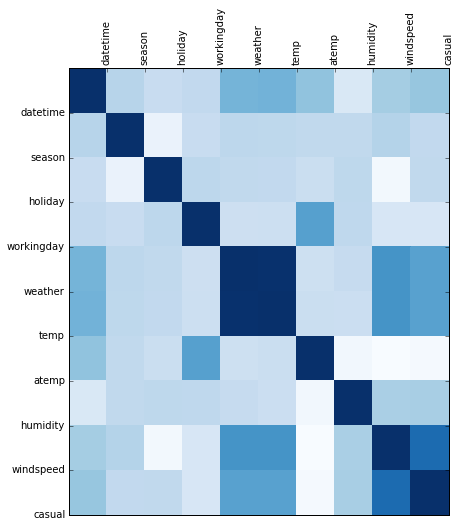

In [21]:
import matplotlib.pyplot as plt
import numpy as np

print(train_df_cas.shape)

corr_data = train_df_cas.corr(method='pearson', min_periods=1)
column_labels = train_df_cas.columns.values.tolist() 
row_labels = row_labels = train_df_cas.columns.values.tolist()
train_df_cas.columns.values.tolist()
data = corr_data

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(121)
#fig, ax = plt.subplots()
heatmap = ax.pcolor(data, cmap=plt.cm.Blues)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[0])+1, minor=False)
ax.set_yticks(np.arange(data.shape[1])+1, minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(row_labels, minor=False, rotation='vertical')
ax.set_yticklabels(column_labels, minor=False, rotation='horizontal')
#plt.savefig("heatmap-correlations.jpg", dpi=150)
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


<Container object of 24 artists>

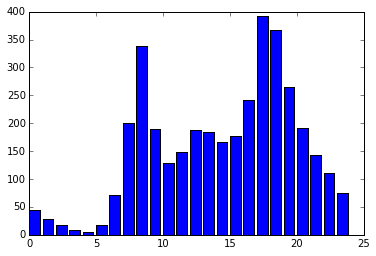

In [22]:
# now see mean counts per hour
hours = np.unique(train_df['hour'])
print(hours)

hours_mean = {}
for h in hours:
    # data frame at only a certain time of day
    temp_df = train_df.loc[train_df['hour'] == h]
    hours_mean[h] = temp_df['registered'].mean()

plt.bar(hours,[hours_mean[h] for h in hours])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


<Container object of 24 artists>

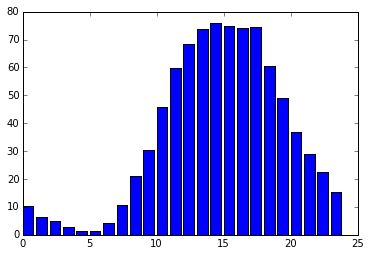

In [23]:
# now see mean counts per hour
hours = np.unique(train_df['hour'])
print(hours)

hours_mean = {}
for h in hours:
    # data frame at only a certain time of day
    temp_df = train_df.loc[train_df['hour'] == h]
    hours_mean[h] = temp_df['casual'].mean()

plt.bar(hours,[hours_mean[h] for h in hours])

[  0.       6.0032   7.0015   8.9981  11.0014  12.998   15.0013  16.9979
  19.0012  19.9995  22.0028  23.9994  26.0027  27.9993  30.0026  31.0009
  32.9975  35.0008  36.9974  39.0007  40.9973  43.0006  43.9989  46.0022
  47.9988  51.9987  56.9969]


<Container object of 27 artists>

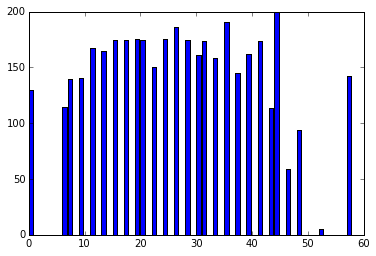

In [24]:
# now see mean counts per hour
wind = np.unique(train_df['windspeed'])
print(wind)

wind_mean = {}
for w in wind:
    # data frame at only a certain time of day
    temp_df = train_df.loc[train_df['windspeed'] == w]
    wind_mean[w] = temp_df['registered'].mean()

plt.bar(wind,[wind_mean[w] for w in wind])

# perform regression (starting with simple sanity check)

In [25]:
#col = ['hour', 'temp', 'workingday', 'year', 'month']
#col = ['hour']
#col = ['tod','temp']
#col = ['tod','season','workingday']
#col = ['hour','season','workingday','temp', 'dayofweek', 'tod']
col_reg = ['opt_wind', 'year','hour','workingday','temp', 'dayofweek', 'commute', 
           'windspeed', 'humidity', 'holiday', 'night', 'new_season']
col_cas = ['year','hour','workingday','temp', 'dayofweek', 'peak', 'windspeed', 
           'humidity', 'holiday', 'night', 'new_season']

# fit the model to the data
model_reg = DecisionTreeRegressor(min_samples_split = 100, min_samples_leaf=1)
model_cas = DecisionTreeRegressor(min_samples_split = 100, min_samples_leaf=1)
#model = tree.DecisionTreeClassifier(min_samples_split = 20)
#model = neighbors.KNeighborsClassifier(n_neighbors = 20)
#model = LogisticRegression(penalty='l1', C = 1.0)

model_reg = model_reg.fit( train_df[col_reg], train_df['registered'])
model_cas = model_cas.fit( train_df[col_cas], train_df['casual'])

# observe the prediction (on the training data: LIKELY OVERFITTING)
pred_count_reg = model_reg.predict(train_df[col_reg])
pred_count_cas = model_cas.predict(train_df[col_cas])


#plt.hold('on')
#plt.plot(range(24),pred_count_reg[0:24])
#plt.plot(range(24),train_df['registered'][0:24])
#plt.hold('off')
#plt.legend(['prediction','actual'])

# score the model (PROBABLY OVERFITTING)
rms_reg = np.sqrt(np.mean(np.square(pred_count_reg - train_df['registered'])))
print("RMS error (registered):",rms_reg)

rms_cas = np.sqrt(np.mean(np.square(pred_count_cas - train_df['casual'])))
print("RMS error (casual):",rms_cas)
print()

score_reg = model_reg.score(train_df[col_reg], train_df['registered'], sample_weight=None)
print("Sample pred (registered): ", pred_count_reg[0:10])
#print(train_df['registered'].values[0:25])
print("Accuracy (registered): ",score_reg)
print()
score_cas = model_cas.score(train_df[col_cas], train_df['casual'], sample_weight=None)
print("Sample pred (casual): ", pred_count_cas[0:10])
#print(train_df['casual'].values[0:25])
print("Accuracy (casual): ",score_cas)

print((pred_count_reg).shape)
print((train_df).shape)


RMS error (registered): 46.1839884387
RMS error (casual): 17.6382370421

Sample pred (registered):  [ 37.87037037  37.87037037  34.90740741  15.45454545   3.92156863
   3.92156863   3.51851852  12.85185185  24.60714286  24.60714286]
Accuracy (registered):  0.906419636409

Sample pred (casual):  [ 4.55844156  4.55844156  4.55844156  4.30508475  0.62337662  0.62337662
  0.62337662  3.23913043  5.41025641  5.41025641]
Accuracy (casual):  0.873872749389
(9174,)
(9174, 22)


In [26]:
def RMSLE_score(predictions, Ytrain ):
    a = (np.log(predictions+1)-np.log(Ytrain+1))
    b = 1./len(predictions) 
    score = (b*sum(a**(2)))**(0.5)
    #print(predictions)
    return score

#we want this number as close to zero as possible? When I check casual, I get .65, when i check registered I get .455
print(RMSLE_score(pred_count_reg, train_df['registered']))
print(RMSLE_score(pred_count_cas, train_df['casual']))

0.384005033154
0.563584968775


# cross validation for model checking

In [27]:
from sklearn.grid_search import GridSearchCV

# Set the parameters by cross-validation
tuned_parameters = [{'min_samples_split': [2, 10, 100, 1000, 10000, 100000]}]

score = 'mean_squared_error'
print("# Tuning hyper-parameters for %s" % score)

clf = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, 
                   cv=5, scoring=score)
clf.fit(train_df[col_reg], train_df['registered'])

print("Best parameters set found on development set:\n")
print(clf.best_estimator_,"\n")
print("Grid scores on development set:\n")

for params, mean_score, scores in clf.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"
          % (np.sqrt(np.abs(scores).mean()), np.sqrt(np.abs(scores)).std() / 2, params))

# Tuning hyper-parameters for mean_squared_error
Best parameters set found on development set:

DecisionTreeRegressor(compute_importances=None, criterion='mse',
           max_depth=None, max_features=None, max_leaf_nodes=None,
           min_density=None, min_samples_leaf=1, min_samples_split=10,
           random_state=None, splitter='best') 

Grid scores on development set:

74.843 (+/-5.643) for {'min_samples_split': 2}
71.885 (+/-5.818) for {'min_samples_split': 10}
79.258 (+/-7.954) for {'min_samples_split': 100}
109.099 (+/-7.098) for {'min_samples_split': 1000}
155.843 (+/-18.001) for {'min_samples_split': 10000}
155.843 (+/-18.001) for {'min_samples_split': 100000}


# creating the test file output

In [28]:
# read in the test data
test_df = pd.read_csv('test_hw5.csv', header=0)
print(test_df.shape)
# add the new feature(s) into the test data

#Create new columns for day, month, year, hour
test_df['year'] = pd.DatetimeIndex(test_df['datetime']).year
test_df['month'] = pd.DatetimeIndex(test_df['datetime']).month
test_df['day'] = pd.DatetimeIndex(test_df['datetime']).day
test_df['hour'] = pd.DatetimeIndex(test_df['datetime']).hour
test_df['dayofweek'] = pd.DatetimeIndex(test_df['datetime']).dayofweek # 0 = Monday to 6 = Sunday

#registered
commute_hours1 = [8, 17, 18]
commute_hours2 = [7, 9, 16, 19]
test_df['commute'] = 0
test_df.commute[test_df.hour.isin(commute_hours1) & test_df.workingday==1] =1
test_df.commute[test_df.hour.isin(commute_hours2) & test_df.workingday==1] =.5

#registered/casual
night = [0,1,2,3,4,5, 6,7, 21,22,23]
test_df['night'] = 0
test_df.night[test_df.hour.isin(night)] = 1

#casual
peak_hours = [10,11,12,13,14,15,16,17,18, 19]
test_df['peak'] = 0
test_df.peak[test_df.hour.isin(peak_hours)] =1


good_months = [3, 4, 10, 11]
bad_months = [1, 2, 12]
best_months = [5, 6, 7, 8, 9]
test_df['new_season'] = 0
test_df.new_season[test_df.month.isin(good_months)] = 1
test_df.new_season[test_df.month.isin(bad_months)] = 2
test_df.new_season[test_df.month.isin(best_months)] = 3


winds = [0, 6.0032, 7.0015, 8.9981,  11.0014,  12.998,   15.0013,  16.9979, 19.0012,  19.9995  ]

test_df['opt_wind'] = 0
test_df.opt_wind[train_df.windspeed.isin(winds)] = 1


C:\Program Files\Anaconda2\lib\site-packages\IPython\kernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda2\lib\site-packages\IPython\kernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda2\lib\site-packages\IPython\kernel\__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda2\lib\site-packages\IPython\kernel\__main__.py:28: SettingWithCopyWarning: 
A value is trying

(1712, 9)


In [29]:
# fit the model to the training data
# note: using the selected columns from before

model_reg = DecisionTreeRegressor(min_samples_split = 100)
model_cas = DecisionTreeRegressor(min_samples_split = 100)

model_reg = model_reg.fit( train_df[col_reg], train_df['registered'])
model_cas = model_cas.fit( train_df[col_cas], train_df['casual'])

# apply to the test data
pred_count_reg = model_reg.predict(test_df[col_reg])
pred_count_cas = model_cas.predict(test_df[col_cas])
test_df['count'] = pred_count_reg+pred_count_cas
test_df['registered'] = pred_count_reg
test_df['casual'] = pred_count_cas

print(pred_count_reg[0:25])
print(pred_count_cas[0:25])


# save as a csv with the header 'count'
out_df = test_df.to_csv('out_hw5_b.csv', index=True, index_label='id', header=True, columns=['casual', 'registered', 'count'])
#out_df = test_df.to_csv('out_hw5_a.csv', index=True, index_label='id', header=True, columns=['count'])




[ 16.27536232  34.16666667   1.58666667   1.58666667   1.58666667
   4.85294118  30.20588235  30.20588235  24.60714286  24.60714286
  47.30508475  47.30508475  59.41333333  59.41333333  59.41333333
  59.41333333  59.41333333  59.41333333  59.41333333  59.41333333
  52.0952381   44.23333333  29.73958333  29.73958333  52.0952381 ]
[  1.6440678    1.6          1.6          1.6          1.6          1.6
   1.15254237   3.23913043   4.78313253   4.78313253  11.69565217
  11.69565217  11.69565217  11.69565217  11.69565217  11.69565217
  11.69565217  11.69565217  11.69565217  11.69565217   2.36363636
   2.36363636   1.22222222   2.36363636   3.13888889]
